In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

plt.style.available
plt.style.use('seaborn-whitegrid')

%matplotlib notebook

# Generative Model

The true generative model $p$ over latents $k, x$ and observed variables $y$ is:
\begin{align}
    k &\sim \mathrm{Categorical}([10, 20], [0.5, 0.5]) \\\
    x &\sim \mathrm{Normal}(0, 1) \\\
    y &\sim \mathrm{Normal}(f(k + x) ,1)
\end{align}
where $f: \mathbb R \to \mathbb R$ is defined as
\begin{align}
    f(x) = ax^2 + bx + c.
\end{align}


<IPython.core.display.Javascript object>


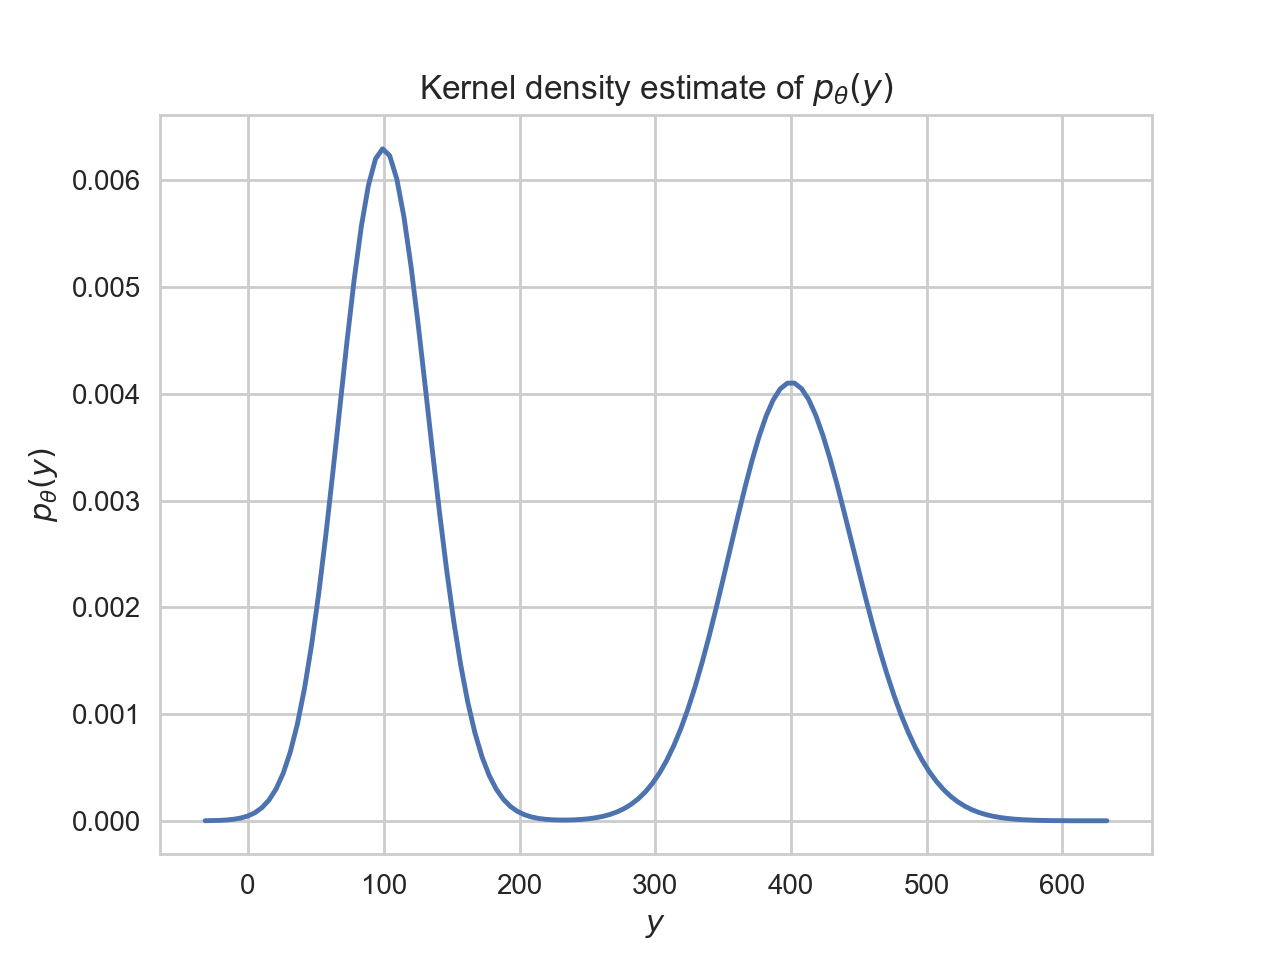

In [6]:
def f(x, a, b, c):
    return a * (x**2) + b * x + c

def generative_model(a, b, c):
    k = np.random.choice([10, 20], p=[0.5, 0.5])
    x = np.random.normal(loc=0, scale=1)
    y = np.random.normal(f(x + k, a, b, c), 1)
    
    return y

(a, b, c) = (1, 0, 0)
num_data = 10000
data = np.array([generative_model(a, b, c) for i in range(num_data)])
fig, ax = plt.subplots()
sns.kdeplot(data, ax=ax)
ax.set_title('Kernel density estimate of $p_{\\theta}(y)$')
ax.set_xlabel('$y$')
ax.set_ylabel('$p_{\\theta}(y)$')

# Generative Network

In [3]:
# class GenerativeNetwork(nn.Module):
#     def __init__(self):